In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load dataset
df = pd.read_csv("E:/Assignment 002/student.csv")

In [3]:
# Column names
print(df.columns)

# First 6 rows
df.head(6)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'fatherd', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13


In [4]:
# Last 6 rows
df.tail(6)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1038,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
1043,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
# Summary of the dataset
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044,1044,1044.000000,1044,1044,1044,1044.000000,1044.000000,1044,1044,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,772,591,NaN,759,738,923,NaN,NaN,399,584,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.726054,NaN,NaN,NaN,2.603448,2.387931,NaN,NaN,...,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,NaN,NaN,1.239975,NaN,NaN,NaN,1.124907,1.099938,NaN,NaN,...,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


In [6]:
# Structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  fatherd     1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [7]:
# Dimensions (rows, columns)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 1044, Columns: 33


In [8]:
# Identify & Convert Binary 'yes/no' Columns to 1/0

# Step 1: Identify binary columns manually
binary_cols = ['schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Step 2: Replace 'yes' with 1 and 'no' with 0 in the selected columns
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

# Step 3 (Optional): Check if the conversion worked
print(df[binary_cols].head())



   schoolsup  famsup  activities  nursery  higher  internet  romantic
0          1       0           0        1       1         0         0
1          0       1           0        0       1         1         0
2          1       0           0        1       1         1         0
3          0       1           1        1       1         1         1
4          0       1           0        1       1         0         0


C:\Users\User\AppData\Local\Temp\ipykernel_27768\19309008.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


In [9]:
# Convert Final Grade (G3) to Categories
# Grade Categorization

def grade_category(g3):
    if g3 < 10:
        return 'Failed'
    elif 10 <= g3 <= 13:
        return 'Pass'
    elif 14 <= g3 <= 15:
        return 'Good'
    else:
        return 'Excellent'

df['grade_category'] = df['G3'].apply(grade_category)


In [10]:
# Select only object-type columns for rule mining
categorical_df = df.select_dtypes(include=['object'])

# Add grade category
categorical_df['grade_category'] = df['grade_category']

# One-hot encoding
encoded_df = pd.get_dummies(categorical_df)

In [11]:
# Select categorical columns and one-hot encode
encoded_df = pd.get_dummies(categorical_df)

# Generate frequent itemsets
frequent_items = apriori(encoded_df, min_support=0.2, use_colnames=True)
print(frequent_items.sort_values(by="support", ascending=False).head())


     support       itemsets
8   0.884100    (Pstatus_T)
18  0.789272   (fatherd_no)
0   0.739464    (school_GP)
5   0.727011    (address_U)
6   0.706897  (famsize_GT3)


In [12]:
# Generate association rules
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by='lift', ascending=False)

# Optional: Convert frozensets to string for easy display
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


                            antecedents                 consequents   support  \
179               Mjob_other, school_GP                  Fjob_other  0.209770   
366                          Mjob_other       Fjob_other, Pstatus_T  0.241379   
365               Mjob_other, Pstatus_T                  Fjob_other  0.241379   
342             Mjob_other, famsize_GT3                  Fjob_other  0.204981   
74                           Mjob_other                  Fjob_other  0.274904   
864    Fjob_other, address_U, Pstatus_T  school_GP, guardian_mother  0.221264   
398              fatherd_no, Mjob_other                  Fjob_other  0.224138   
534               Fjob_other, address_U  school_GP, guardian_mother  0.259579   
810         sex_F, school_GP, Pstatus_T      address_U, famsize_GT3  0.219349   
827  Fjob_other, address_U, famsize_GT3        school_GP, Pstatus_T  0.217433   

     confidence      lift  
179    0.771127  1.378521  
366    0.631579  1.297969  
365    0.724138  1.29452

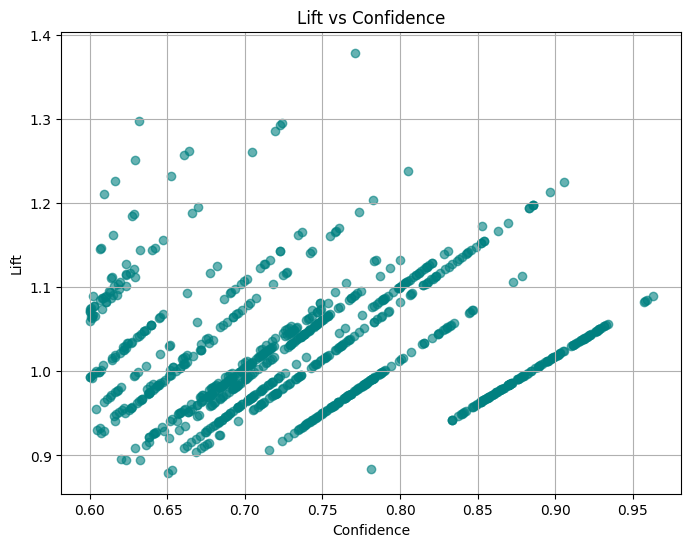

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.6, color='teal')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Lift vs Confidence')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_27768\4090422196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['rule'] = top10['antecedents'] + ' → ' + top10['consequents']


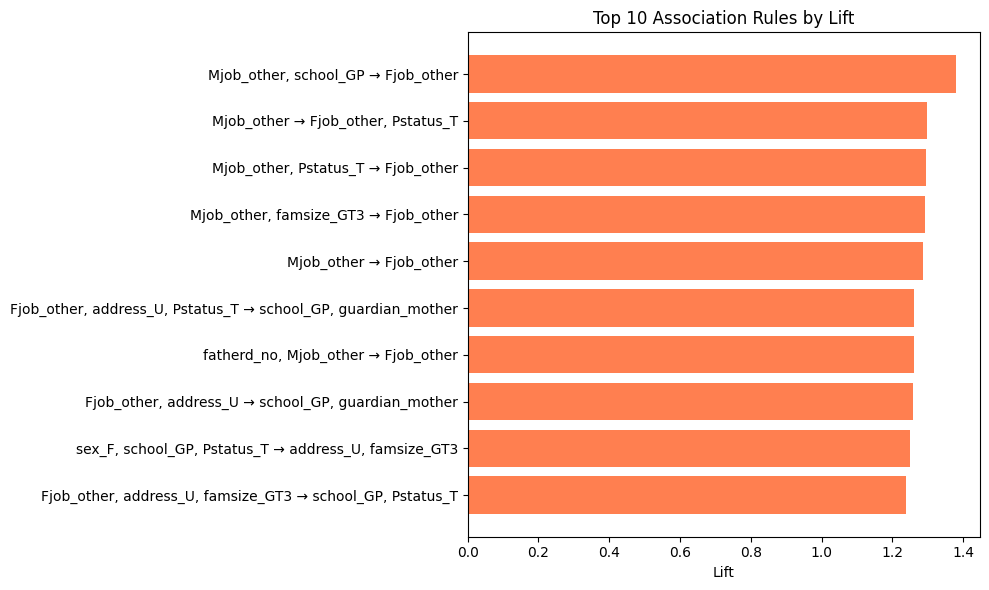

In [15]:
# Bar plot: Top 10 Rules by Lift

top10 = rules.head(10)
top10['rule'] = top10['antecedents'] + ' → ' + top10['consequents']

plt.figure(figsize=(10,6))
plt.barh(top10['rule'], top10['lift'], color='coral')
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


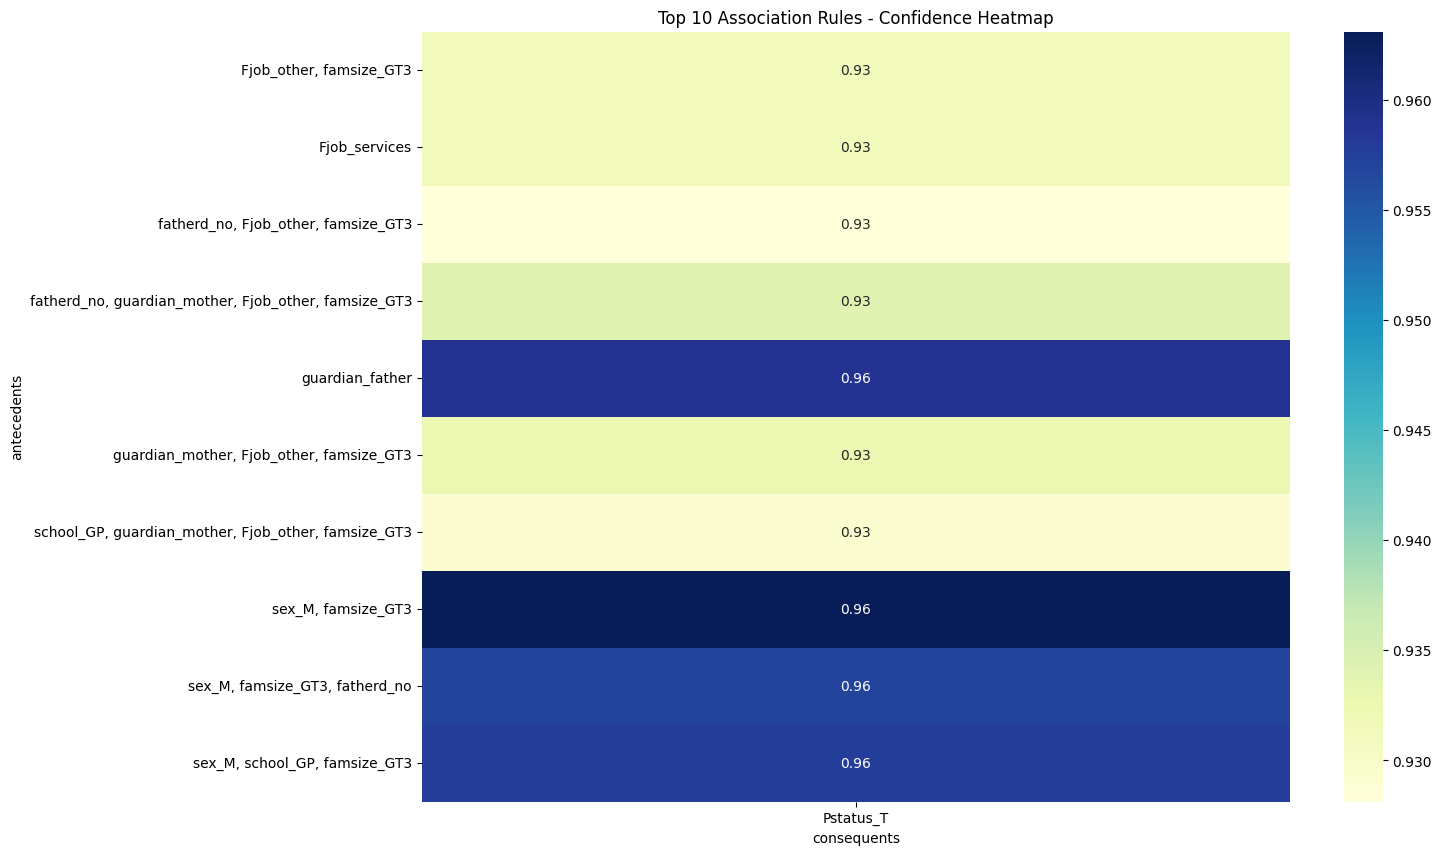

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top 50 rules based on confidence
top_rules = rules.sort_values('confidence', ascending=False).head(10)

# Now create a smaller pivot table
pivot = top_rules.pivot_table(index='antecedents', columns='consequents', values='confidence', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Top 10 Association Rules - Confidence Heatmap')
plt.show()
